In [1]:
import pandas as pd
import numpy as np
import chardet

# Replace 'your_file.csv' with the path to your CSV file
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
df = pd.read_csv('spam.csv', encoding=result['encoding'])


In [2]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df.rename(columns ={'v1':'labels','v2':'msg'},inplace=True)

In [5]:
df

,labels,msg,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
dataset=df[["labels","msg"]]

In [7]:
dataset

,labels,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
dataset.isnull().sum()

labels    0
msg       0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5572 non-null   object
 1   msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
dataset['labels']=dataset['labels'].map({'ham':0,
                                 'spam':1})

C:\Users\kykne\AppData\Local\Temp\ipykernel_31760\2852189144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['labels']=dataset['labels'].map({'ham':0,


In [11]:
dataset

,labels,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
dataset.describe()

,labels
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

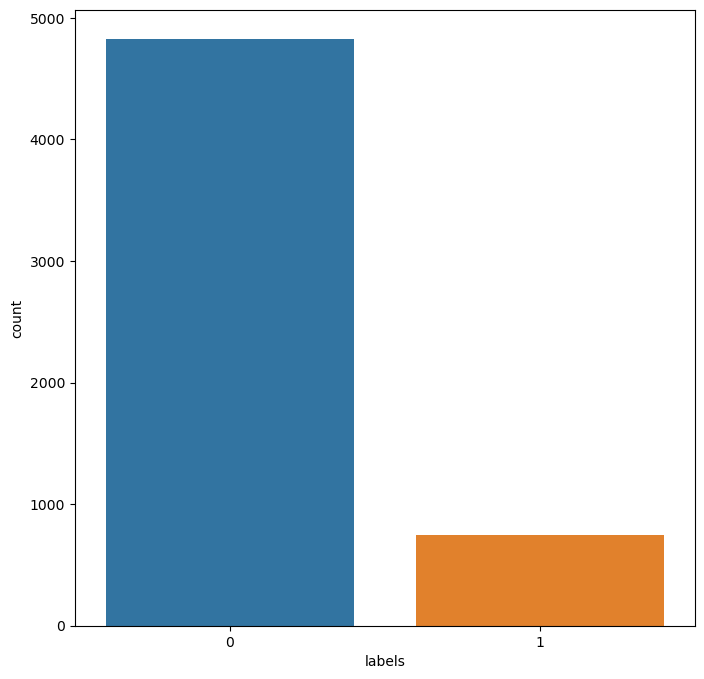

In [14]:
plt.figure(figsize=(8,8))
p= sns.countplot(x="labels",data=dataset)

In [15]:
only_spam =dataset[dataset["labels"]==1]
len(only_spam)

747

In [16]:
count= int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])

In [17]:
count

6

In [18]:
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])

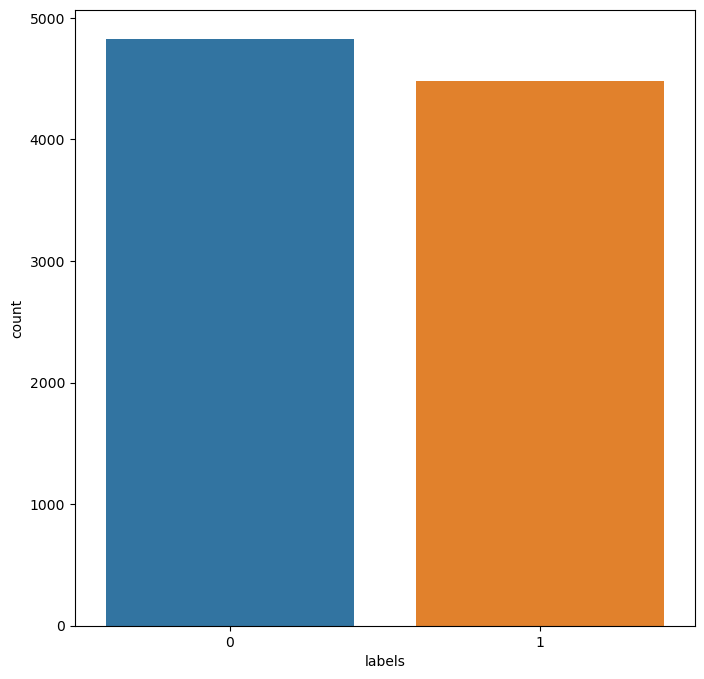

In [19]:
plt.figure(figsize=(8,8))
p= sns.countplot(x="labels",data=dataset)

In [20]:
dataset

,labels,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [21]:
dataset=dataset.reset_index()

In [22]:
dataset

,index,labels,msg
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [23]:
dataset

,index,labels,msg
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [24]:
dataset['word_count']=dataset['msg'].apply(lambda x:len(x.split()))

In [25]:
dataset

,index,labels,msg,word_count
0,0,0,"Go until jurong point, crazy.. Available only ...",20
1,1,0,Ok lar... Joking wif u oni...,6
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,3,0,U dun say so early hor... U c already then say...,11
4,4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


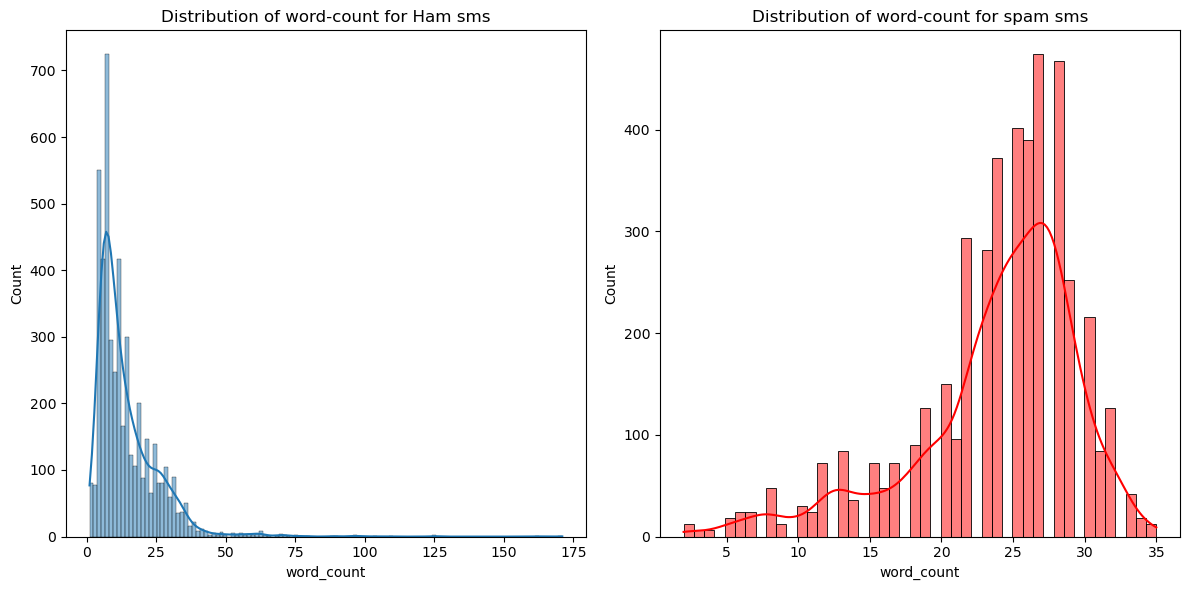

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset["labels"]==0].word_count,kde=True)
p=plt.title('Distribution of word-count for Ham sms')

plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset["labels"]==1].word_count,color="red",kde=True)
p=plt.title('Distribution of word-count for spam sms')

plt.tight_layout()
plt.show()

In [27]:
def currency(data):
    currency_symbols=['$','£','¥','₹','£']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [28]:
dataset['contains_currency_symbols']=dataset['msg'].apply(currency)

In [29]:
dataset

,index,labels,msg,word_count,contains_currency_symbols
0,0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,1,0,Ok lar... Joking wif u oni...,6,0
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,3,0,U dun say so early hor... U c already then say...,11,0
4,4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


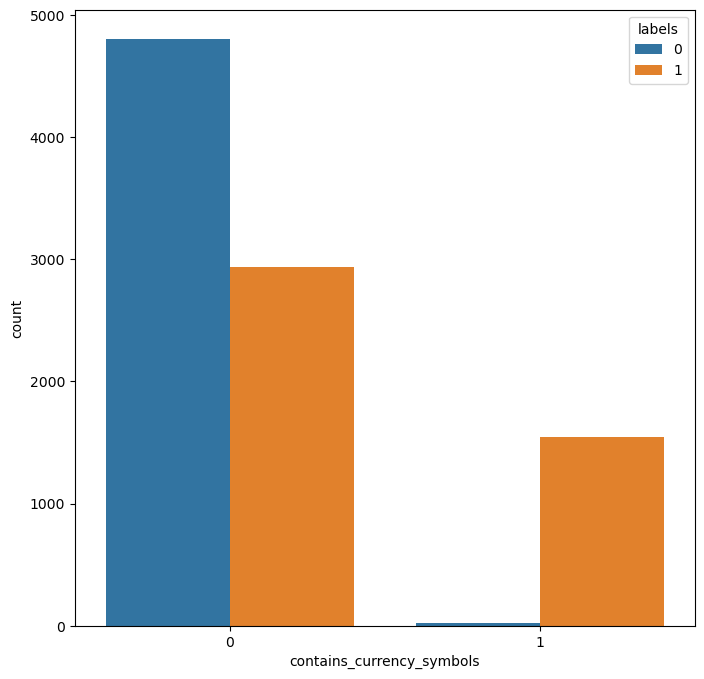

In [30]:
plt.figure(figsize=(8,8))
p=sns.countplot(x="contains_currency_symbols",data=dataset,hue='labels')

In [31]:
def number(data):
    for i in data:
        if ord(i) >=48 and ord(i)<=57:
            return 1
    return 0
    
    

In [32]:
dataset['contains_numbers']=dataset['msg'].apply(number)

In [33]:
dataset

,index,labels,msg,word_count,contains_currency_symbols,contains_numbers
0,0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,1,0,Ok lar... Joking wif u oni...,6,0,0
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,3,0,U dun say so early hor... U c already then say...,11,0,0
4,4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


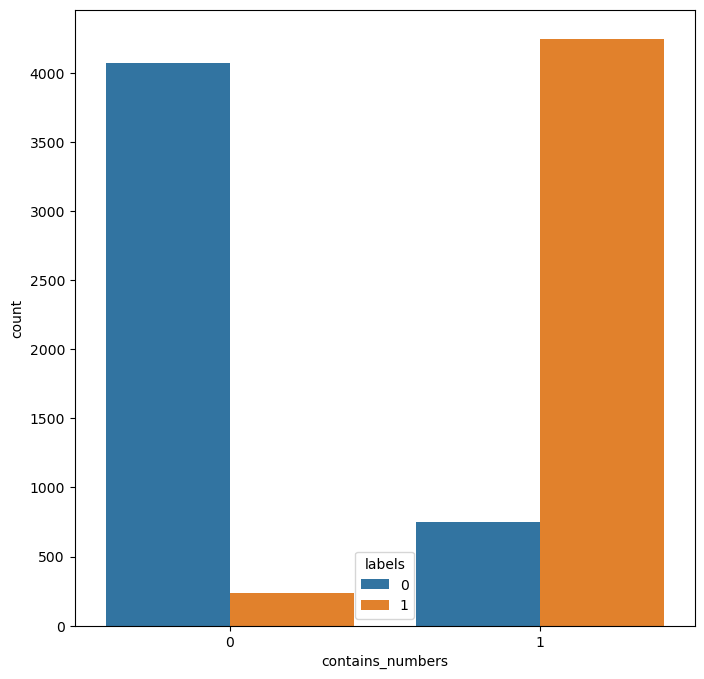

In [34]:
plt.figure(figsize=(8,8))
p=sns.countplot(x="contains_numbers",data=dataset,hue='labels')

In [50]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [51]:
corpus =[]
wnl =  WordNetLemmatizer()

In [52]:
for sms in list(dataset.msg):
    msg=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)
    words=msg.split() 
    lemm_words=[wnl.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    msg=' '.join(lemm_words)
    
    corpus.append(msg)

In [53]:
corpus

['Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat',
 'Ok lar Joking wif u oni',
 'Free entry wkly comp win FA Cup final tkts st May Text FA receive entry question std txt rate T C apply',
 'U dun say early hor U c already say',
 'Nah I think go usf life around though',
 'FreeMsg Hey darling week word back I like fun still Tb ok XxX std chgs send rcv',
 'Even brother like speak They treat like aid patent',
 'As per request Melle Melle Oru Minnaminunginte Nurungu Vettam set callertune Callers Press copy friend Callertune',
 'WINNER As valued network customer selected receivea prize reward To claim call Claim code KL Valid hour',
 'Had mobile month U R entitled Update latest colour mobile camera Free Call The Mobile Update Co FREE',
 'I gonna home soon want talk stuff anymore tonight k I cried enough today',
 'SIX chance win CASH From pound txt CSH send Cost p day day TsandCs apply Reply HL info',
 'URGENT You week FREE membership Prize Jackpot Txt word 

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have the 'corpus' variable defined as a list of text documents

# Initialize the TfidfVectorizer with the max_features parameter
tfidf = TfidfVectorizer(max_features=500)

# Transform the text data into a TF-IDF matrix and convert it to an array
vectors = tfidf.fit_transform(corpus).toarray()

# Get the feature names from the TfidfVectorizer
feature_names = tfidf.get_feature_names_out()


In [55]:
X = pd.DataFrame(vectors, columns=feature_names)
y= dataset['labels']

In [56]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [42]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [43]:
from sklearn.naive_bayes import MultinomialNB
mnb=  MultinomialNB()
cv = cross_val_score(mnb,X,y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.95
0.005


In [44]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)

In [45]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[920,  38],
       [ 55, 849]], dtype=int64)

In [46]:
acc=accuracy_score(y_test,y_pred)
acc

0.9500537056928035

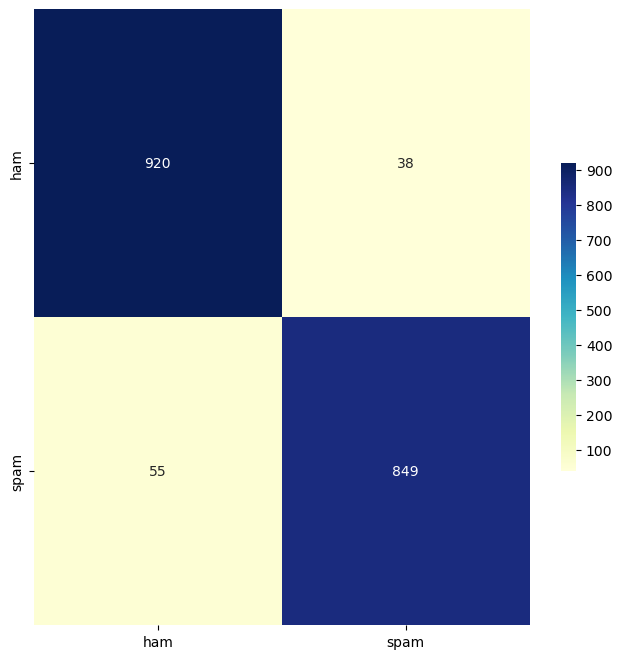

In [47]:
plt.figure(figsize=(8,8))
axis_labels=['ham','spam']
g= sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot= True,fmt='g',cbar_kws={"shrink":0.5},cmap="YlGnBu")

In [48]:
def predict_spam(sms):
    message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words={wnl.lemmatize(word) for word in filtered_words}
    message=' '.join(lemm_words)
    temp=tfidf.transform([message]).toarray()
    return mnb.predict(temp)

In [49]:
#prediction
sample_message='lets end this intern'
if predict_spam(sample_message):
    print(' this is a spam message')
else:
     print('this is a ham message')

this is a ham message


C:\Users\kykne\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
